In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
import os
os.getcwd()

'/Users/honggao/Desktop/olympics'

In [119]:
# load dataset

athletes = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [120]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [121]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
#join dataframes using panda and do a left join

athletes_df = athletes.merge(region, how = 'left', on = 'NOC')
# this will join 'regions' and 'notes' to the rest of the event graph and use left so that A Dijiang starts first
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
athletes_df.shape 
#using numpy to see how many rows, columns

(271116, 17)

In [10]:
# make column names consistent using numpy
athletes_df.rename(columns={'region':'Region','notes':'Notes'});

In [122]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
athletes_df.info() #pandas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [13]:
athletes_df.describe() #pandas to describe stats

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [14]:
#check null values
nan_values = athletes_df.isna()
nan_columns=nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [15]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [16]:
# Q) Print the column names containing null values or missiong values

In [17]:
# China data
athletes_df.query('Team == "China"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [19]:
# US Data
athletes_df.query('Team == "United States"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [53]:
# top countries participating
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries
# number of athletes since 1896

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

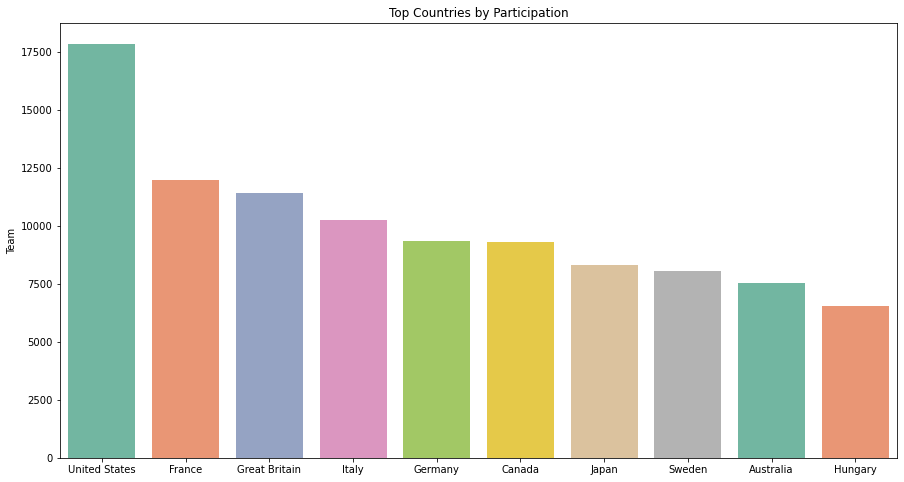

In [59]:
# plot for the top 10 countries
plt.figure(figsize=(15,8))
plt.title('Top Countries by Participation')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2');

#top 3 countries are US, France, and GB

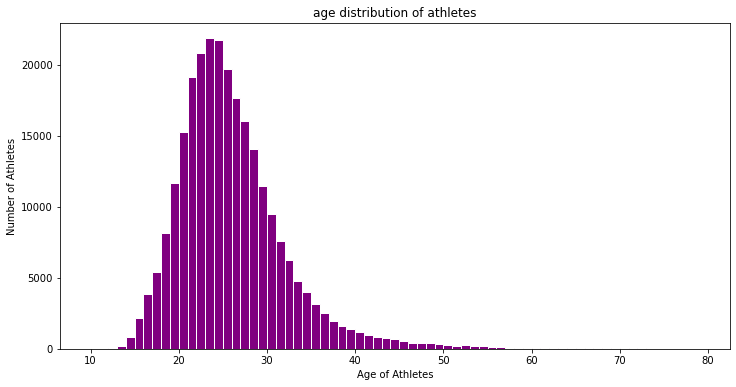

In [79]:
# age distribution of athletes
plt.figure(figsize=(12,6))
plt.title("age distribution of athletes")
plt.xlabel('Age of Athletes')
plt.ylabel('Number of Athletes')
plt.hist(athletes_df.Age, bins = np.arange(10,80,1), color='purple', edgecolor= 'white');

#majority of athletes are in their mid-20s

In [80]:
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [82]:
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [83]:
# male and female

gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

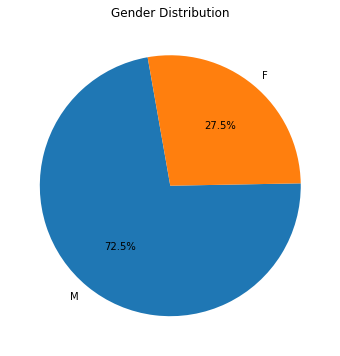

In [91]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=100); 

In [92]:
#total medals
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [98]:
female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex','Year']]
female_participants=female_participants.groupby('Year').count().reset_index()
female_participants

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [99]:
womenOlympics = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

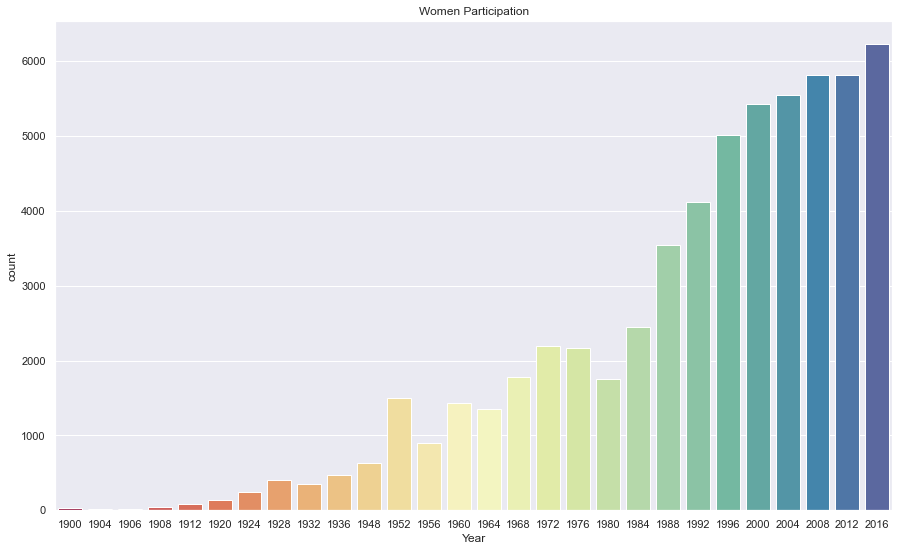

In [105]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,9))
sns.countplot(x='Year', data=womenOlympics, palette='Spectral')
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Atheles over time')

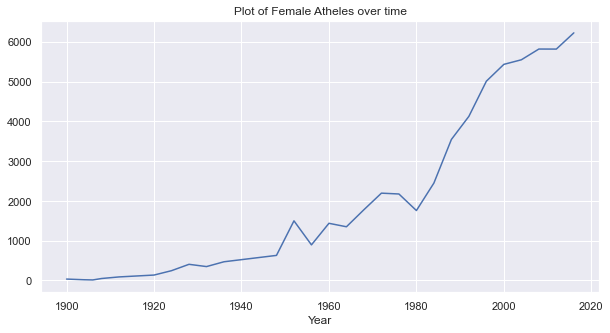

In [108]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,'F'].plot()
plt.title('Plot of Female Atheles over time')
#why did it dropped in 1956?
#The Netherlands, Spain and Switzerland boycotted the event in protest at the Soviet Union presence in light of their recent crushing of the Hungarian Revolution. The People's Republic of China chose to boycott the event because Taiwan had been allowed to compete.

#why did it dropped in 1980?
#1980. The Details: Protesting the December 27, 1979, Soviet invasion of Afghanistan, more than 60 nations refused to compete in the Moscow-held game

In [110]:
#Gold medal athletes

goldMedals= athletes_df[(athletes_df.Medal =='Gold')]
goldMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


In [111]:
# gold beyond 60
goldMedals['ID'][goldMedals['Age']>60].count()

6

In [113]:
sporting60= goldMedals['Sport'][goldMedals['Age']>60]
sporting60

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/Users/honggao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years')

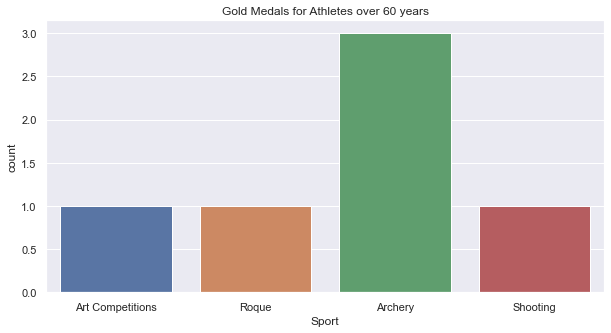

In [115]:
#plot for sporting_event
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting60)
plt.title('Gold Medals for Athletes over 60 years')

In [124]:
# Gold from each country
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Gold Medals per Country')

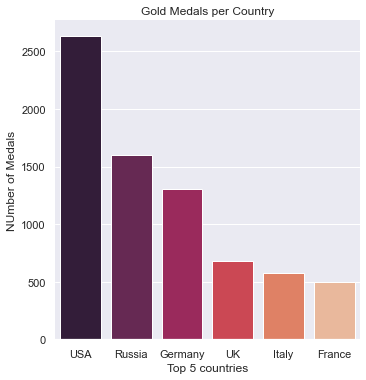

In [125]:
totalGoldMedals= goldMedals.region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x='index', y='Medal', data=totalGoldMedals,
                height=5, kind='bar', palette='rocket')

g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels('NUmber of Medals')
plt.title('Gold Medals per Country')

In [131]:
#rio olympics
max_year = athletes_df.Year.max()
print(max_year)

team_names= athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, '2016 Total Gold Medals')

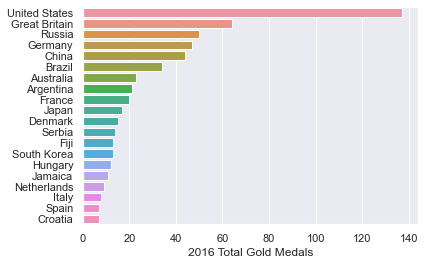

In [132]:
#rio 2016 gold medals

sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('2016 Total Gold Medals')

In [133]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull() & (athletes_df['Weight'].notnull()))]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalist')

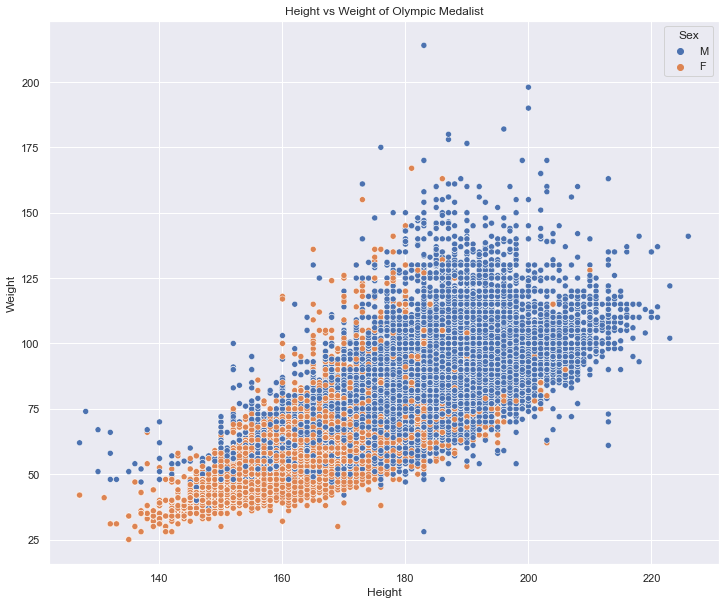

In [135]:
plt.figure(figsize = (12,10))
axis=sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex' )
plt.title('Height vs Weight of Olympic Medalist')